### Name: Prathamesh Rokade
### Branch: AIML - C
### Roll No.: 57
### Date: 27/08/2024

### Aim:
### Apply dimensionality reduction technique
### Principle Component Analysis (PCA) on digit classification dataset and then apply logistic regression algorithm to generate the model.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [11]:
# Import dataset
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target

In [13]:
# Basic EDA
print("Dataset shape:", X.shape)
print("Target shape:", y.shape)
print("Unique classes:", np.unique(y))

Dataset shape: (1797, 64)
Target shape: (1797,)
Unique classes: [0 1 2 3 4 5 6 7 8 9]


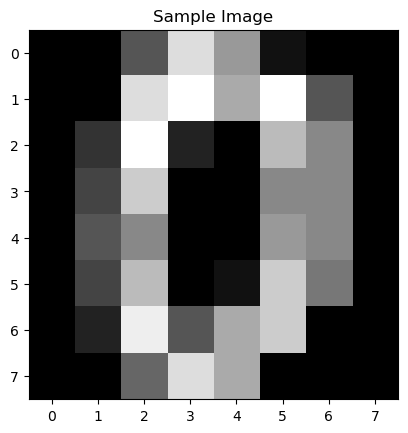

In [15]:
# Plot a sample image
plt.imshow(X[0].reshape((8, 8)), cmap='gray')
plt.title("Sample Image")
plt.show()

In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
# Prepare dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Apply Logistic Regression
log_reg = LogisticRegression(max_iter=2000)

In [31]:
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [33]:
# Evaluate performance
y_pred = log_reg.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9722222222222222
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       0.97      1.00      0.99        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.92      0.94      0.93        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [35]:
# Apply PCA
pca = PCA(n_components=30)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [37]:
X_train_pca.shape

(1437, 30)

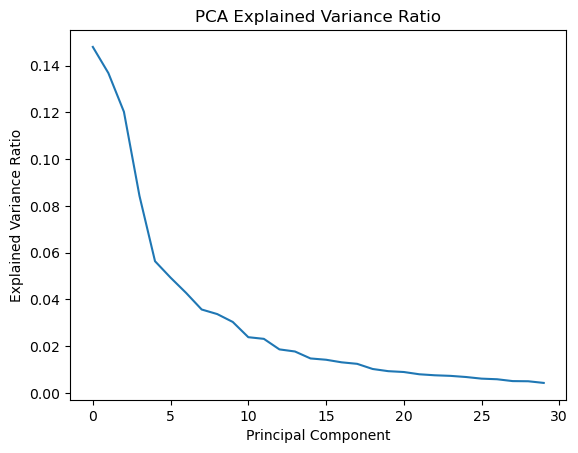

In [39]:
# Plot explained variance ratio
plt.plot(pca.explained_variance_ratio_)
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("PCA Explained Variance Ratio")
plt.show()

In [41]:
# Apply Logistic Regression on PCA-transformed data
log_reg_pca = LogisticRegression()
log_reg_pca.fit(X_train_pca, y_train)

LogisticRegression()

In [43]:
# Evaluate performance on PCA-transformed data
y_pred_pca = log_reg_pca.predict(X_test_pca)
print("Accuracy (PCA):", accuracy_score(y_test, y_pred_pca))
print("Classification Report (PCA):")
print(classification_report(y_test, y_pred_pca))

Accuracy (PCA): 0.9722222222222222
Classification Report (PCA):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.93      1.00      0.97        28
           2       1.00      0.97      0.98        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.92      0.96      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Define the pipeline with PCA and Logistic Regression
pipe = Pipeline([
    ('pca', PCA()),
    ('log_reg', LogisticRegression(max_iter=1000))
])

# Define the hyperparameter space for the number of components in PCA
param_grid = {
    'pca__n_components': [10,20,30,35,40,45,50]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best number of components:", grid_search.best_params_['pca__n_components'])
print("Best score:", grid_search.best_score_)

# Train the model with the best number of components on the entire training set
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = best_model.predict(X_test)
print("Test accuracy:", accuracy_score(y_test, y_pred))

Best number of components: 50
Best score: 0.9568428184281842
Test accuracy: 0.9722222222222222
